# Analisando os preços das casas de Melbourne

#### Esse banco de dados pode ser encontrado no link: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.options.display.float_format= '{:,.2f}'.format
%matplotlib inline

In [13]:
base = pd.read_csv('Dados/melb_data.csv')

In [14]:
base.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",...,1.00,2.00,120.00,142.00,"2,014.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


### Tratando a base para usar o modelo

In [15]:
# Vou tirar as colunas que tiverem uma alta cardinalidade
base = base.drop(['Suburb', 'Address', 'SellerG', 'Date'], axis=1)

In [16]:
# Também vamos retirar colunas com mais de 20% de valores nulo
base = base.drop(['BuildingArea', 'YearBuilt'], axis=1)

In [17]:
base.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,"1,480,000.00",S,2.50,"3,067.00",2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,2,h,"1,035,000.00",S,2.50,"3,067.00",2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,3,h,"1,465,000.00",SP,2.50,"3,067.00",3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,3,h,"850,000.00",PI,2.50,"3,067.00",3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,4,h,"1,600,000.00",VB,2.50,"3,067.00",3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


### Correlação entre as variáveis


<AxesSubplot:>

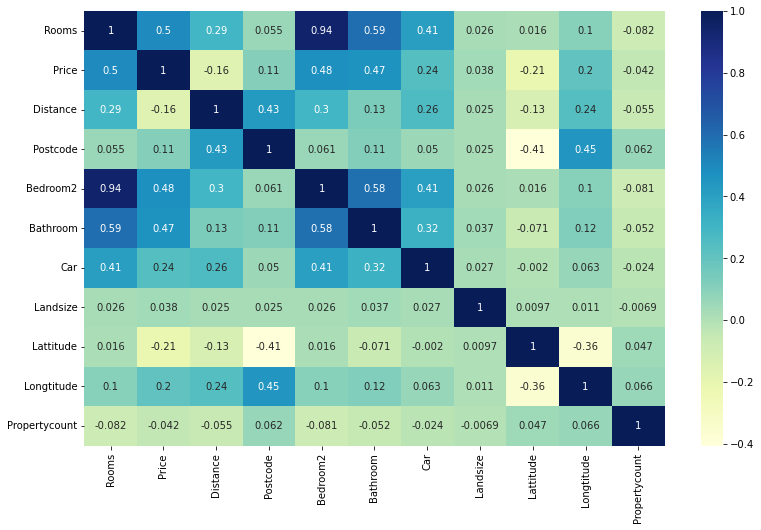

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True, cmap='YlGnBu')

In [67]:
base1 = base[["Price", "Rooms", "Bathroom","Bedroom2", "Car", "Landsize"]]

### Verificando a base tratada

In [22]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


#### Dropando os valores nulos de car

In [23]:
base1 = base1.dropna(axis=0)

In [24]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [25]:
base1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,"1,480,000.00",2,1.00,2.00,1.00,202.00
1,"1,035,000.00",2,1.00,2.00,0.00,156.00
2,"1,465,000.00",3,2.00,3.00,0.00,134.00
3,"850,000.00",3,2.00,3.00,1.00,94.00
4,"1,600,000.00",4,1.00,3.00,2.00,120.00


### Criando o modelo de ML

In [27]:
Y = base1.Price
X = base1.drop('Price', axis = 1)

In [36]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y)

### Regressão Linear

In [37]:
# Importando o Modelo
from sklearn.model_selection import train_test_split

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo
modelo_regressao.fit(x_treino, y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

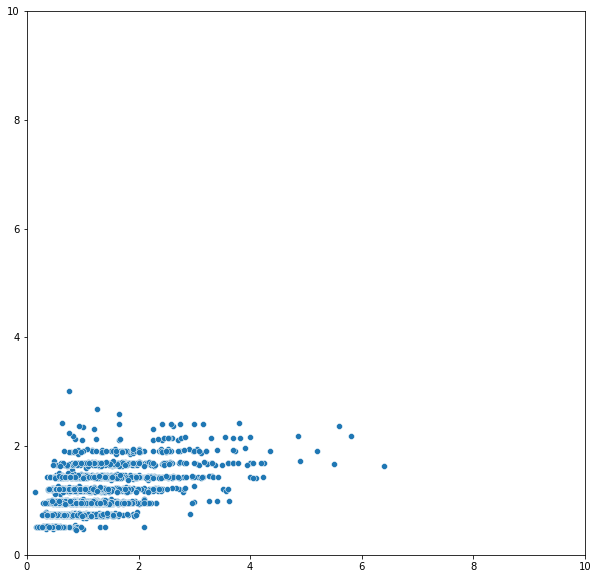

In [38]:
# Podemos visualizar os pontos previstos X real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000, y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [40]:
# Avaliando o erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste, y_regressao)
print(erro_quadratico_regressao)

282539124153.4791


In [41]:
# Avaliando o R quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste, y_regressao)
print(r2_regressao)

0.3056223388561333


### Regressão Linear: Selecionando outras colunas

In [48]:
base2 = base[['Price', 'Rooms', 'Bathroom', 'Bedroom2', 'Car', 'Longtitude', 'Lattitude', 'Distance', 'Landsize', 'Postcode', 'Propertycount']]

In [46]:
base.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [50]:
# Verificando os valores nulos e tratando
base2 = base2.dropna(axis=0)
base2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Lattitude      13518 non-null  float64
 7   Distance       13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


#### Realizei as mesmas etapas anteriormente

In [56]:
# 1 .Separar a base
Y = base2.Price
X = base2.drop('Price', axis=1)

# 2. Dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y)

## Fazendo o fit para os novos dados
# 3. Instanciando
modelo_regressao2 = LinearRegression()

# 4. Realizando o fit do modelo
modelo_regressao2.fit(x_treino, y_treino)

# 5. Usando o modelo para prever os dados de teste
y_regressao2 = modelo_regressao2.predict(x_teste)

## Avaliando os Erros
# 6. Erro quadrático médio
erro_quadratico_regressao2 = mean_squared_error(y_teste, y_regressao2)
print(f'Erro Quadrático Médio: {erro_quadratico_regressao2}')

# 7. R_quadrado
r2_regressao2 = r2_score(y_teste, y_regressao2)
print(f'R2: {r2_regressao}')

Erro Quadrático Médio: 202689363011.38284
R2: 0.3056223388561333


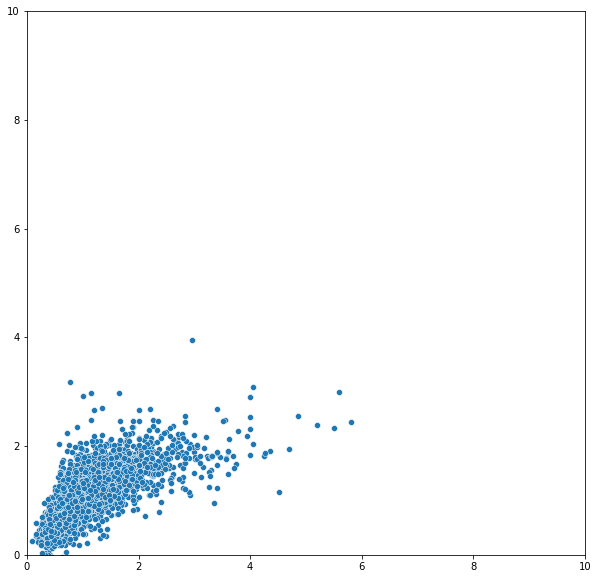

In [59]:
# Podemos Visualizar os Pontos Previstos x Real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000, y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

### Árvore de Decisão

In [61]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando 
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino, y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [64]:
## Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste, y_arvore_decisao)
print(f'Erro Quadrático Árvore de Decisão: {erro_quadratico_arvore_decisao}')

# R Quadrado
r2_arvore_decisao = r2_score(y_teste, y_arvore_decisao)
print(f'R2 Árvore de Decisão : {r2_arvore_decisao}')

Erro Quadrático Árvore de Decisão: 190028262597.76865
R2 Árvore de Decisão : 0.5183945462552328


### Fazendo um resumo dos resultados

In [66]:
print('Regressão Linear')
print('Erro quadrático médio ' + str(round(erro_quadratico_regressao, 2)))
print('R quadrado ' + str(round(r2_regressao, 4)))
print('-----------------------------------------')
print('Regressão Linear: novas features')
print('Erro quadrático médio ' + str(round(erro_quadratico_regressao2, 4)))
print('R quadrado ' + str(round(r2_regressao2, 4)))
print('-----------------------------------------')
print('Árvore de Decisão')
print('Erro quadrático médio ' + str(round(erro_quadratico_arvore_decisao, 2)))
print('R quadrado ' + str(round(r2_arvore_decisao, 4)))

Regressão Linear
Erro quadrático médio 282539124153.48
R quadrado 0.3056
-----------------------------------------
Regressão Linear: novas features
Erro quadrático médio 202689363011.3828
R quadrado 0.4863
-----------------------------------------
Árvore de Decisão
Erro quadrático médio 190028262597.77
R quadrado 0.5184


#### O modelo de Árvore de Decisão teve o melhor resultado, maior R² e menor Erro Quadrático Médio entre os outros modelos